In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [49]:
import pandas as pd
import matplotlib
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

### Data Table: (Rows, Columns)

In [51]:
df=pd.read_csv('311_geo_report_tracts.csv',parse_dates=['requested_datetime','updated_datetime','closed_date'])
df.shape

(25739, 23)

### Sample Data

In [52]:
df.head()

,service_request_id,service_name,requested_datetime,source,description,status_description,updated_datetime,service_subtype,neighborhood_district,closed_date,...,long,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,400578,Trash questions,2015-07-02 12:17:00,33891,DPW Sanitation,Closed,2017-06-26 20:17:00,information calls,Ward 7,2017-06-26 20:17:00,...,-71.12520,25,17,350600,1400000US25017350600,25017350600,3506.0,CT,516247,0
1,400606,Request tree on public property,2015-07-02 12:59:00,43103,OSPCD,Closed,2017-06-08 12:35:00,Service Requests,Ward 5,2017-06-08 12:35:00,...,-71.10195,25,17,350200,1400000US25017350200,25017350200,3502.0,CT,683707,0
2,401540,Temporary no parking sign posting,2015-07-07 10:08:00,43542,Traffic and Parking,Closed,2017-06-29 15:58:00,internally generated,Ward 6,2017-06-29 15:58:00,...,-71.11537,25,17,350900,1400000US25017350900,25017350900,3509.0,CT,421685,0
3,402710,Request tree on public property,2015-07-10 11:12:00,27228,OSPCD,Closed,2016-02-23 10:08:00,Service Requests,Ward 3,2016-02-23 10:08:00,...,-71.11064,25,17,351000,1400000US25017351000,25017351000,3510.0,CT,668313,0
4,403238,Arborist and tree maintenance,2015-07-13 15:20:00,31420,DPW-Highway,Closed,2017-05-09 14:03:00,Service Requests,Ward 7,2017-05-09 14:03:00,...,-71.12431,25,17,350600,1400000US25017350600,25017350600,3506.0,CT,516247,0


### Number of request per year

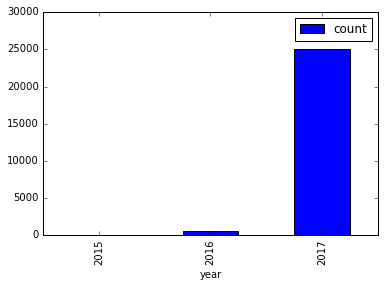

In [53]:
df['count']=1
df['year']=df.requested_datetime.dt.year
df[['year','count']].groupby('year').count().plot(kind='bar')

### Number of request per month (2017)

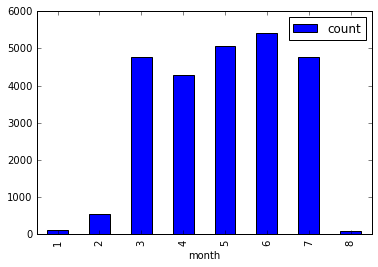

In [54]:
df=df[df['year']==2017]
df['month']=df.requested_datetime.dt.month
df[['month','count']].groupby('month').count().plot(kind='bar')

In [55]:
df=df[df.month>2]
df.shape

(24390, 26)

In [56]:
dg=df.groupby('TRACTCE').count()
tracts=dg[dg['count']>10].index
df=df[df.TRACTCE.isin(tracts)]
df=df.reset_index(drop=True)

In [57]:
df.service_name.value_counts()[0:50]

Pothole                                               1754
Obtain a parking permit inquiry                       1329
Temporary no parking sign posting                     1274
Illegal parking                                        872
TV/monitor pick up                                     854
School building maintenance & repairs                  827
Repeat Call                                            534
Trash questions                                        449
Sidewalk repair                                        418
City building maintenance & repairs                    402
Down tree limb branch                                  400
Residential & other non-business permit assistance     397
CS-Lost call (wrong #, hang up, dead air)              397
Miscellaneous                                          382
Tree trimming/pruning                                  373
Consideration request                                  365
Online permit help/questions                           3

In [58]:
df.service_name.value_counts()[50:100]

Trash issues                                          123
OSPCD                                                 123
Deliveries for events                                 122
Street/road defect                                    120
Treasury-Municipal billing/tax information            113
Sustainability & environment                          112
Welcome desk online assistance                        110
ISD-Health                                            109
City event information-sponsored                      107
City school department call                           107
T&P Miscellaneous                                     102
CS-Street sweeper schedule & alert add/remove          99
City Clerk                                             99
Reschedule hearing request                             97
Sinkhole                                               97
Sewer                                                  94
Construction and road work inquiries                   90
Abandoned prop

In [59]:
dg=df.groupby('service_name').count()
services=['TV/monitor pick up','Illegal parking','ISD-Buildings','Street light issue','Abandoned property','Power outage']
df=df[df.service_name.isin(services)]
df=df.reset_index(drop=True)

In [60]:
df['week']=df.requested_datetime.dt.week
dg=df[['week','TRACTCE','service_name','count']].groupby(['week','TRACTCE','service_name']).count()
dg=dg.unstack().reset_index()
dg.columns=['Week Number','Tract Number']+list(dg.columns.get_level_values(1)[2:])

In [66]:
dg=dg.fillna(0)
dg.shape

(394, 8)

In [62]:
dg.to_csv('311_tract_groups.csv',index=False)